# 5.2 분산분석

5.2.1 이 절의 예제

5.2.2 분산분석이 필요한 시기

5.2.3 검정의 다중성

5.2.4 분산분석의 직감적 사고방식 

5.2.5 유의미한 차이가 있을 때와 없을 때의 바이올린플롯

5.2.6 분산분석의 직감적 사고방식: 오차 및 효과의 분리

5.2.7 군간변동과 군내변동

5.2.8 분석 준비

In [2]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

5.2.9 데이터 작성과 표시

In [3]:
weather = ["cloudy", "cloudy", "rainy", "rainy", "sunny", "sunny"]
beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({"beer": beer, "weather": weather})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

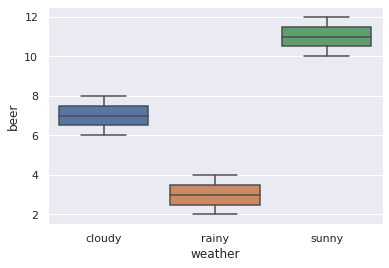

In [4]:
sns.boxplot(x="weather", y="beer", data=weather_beer)

In [5]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy    7.0
rainy     3.0
sunny    11.0
